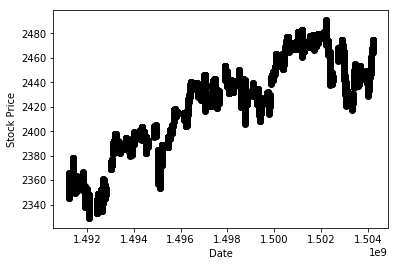

In [2]:
# Importing packages for basic Stock Data Analysis and Prediction.
import numpy as np
import matplotlib.pyplot as py
import pandas as pd
import os
dataFileName = os.getcwd() + "/Desktop/stockData/stockDataFile.csv"
data = pd.read_csv(dataFileName ,delimiter = None)
date = data['DATE']
stockVal = data['SP500']

# Plotting the stock data for the entire dataset for the stock item SP500
py.scatter(date,stockVal,color='black')
py.xlabel('Date')
py.ylabel('Stock Price')
py.show()

In [24]:
# Data Splitting ie. 70% : Training Data 15% : Validation Data and rest 15% : Test Data
# Genreating Random Data Array for Input Data Split

inputDataSize = stockVal.size
trainingSampleCount = (int)(inputDataSize * 0.7)
validationSampleCount = (int)(inputDataSize * 0.15)
testSampleCount = validationSampleCount
randomIndexArray = np.random.permutation(inputDataSize)

# Data Split and conversion into matrices for input into the linear regression object
xTrainingArray = date[randomIndexArray[:trainingSampleCount]]
yTrainingArray = stockVal[randomIndexArray[:trainingSampleCount]]

xValidationArray = date[randomIndexArray[trainingSampleCount:trainingSampleCount + validationSampleCount]]
yValidationArray = stockVal[randomIndexArray[trainingSampleCount:trainingSampleCount + validationSampleCount]]

xTestArray = date[randomIndexArray[trainingSampleCount + testSampleCount:]]
yTestArray = stockVal[randomIndexArray[trainingSampleCount + testSampleCount:]]


In [29]:
yTestArray.ndim

1

In [19]:
xTrainingSet = np.matrix(xTrainingArray.values.reshape(len(xTrainingArray),1))
yTrainingSet = np.matrix(yTrainingArray.values.reshape(len(yTrainingArray),1))

In [10]:
# Importing required regression packages
from sklearn import linear_model, datasets

In [20]:
#Create a least squared error linear regression object
model = linear_model.LinearRegression() 

#Fit the line to the training data
model.fit(xTrainingSet, yTrainingSet)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

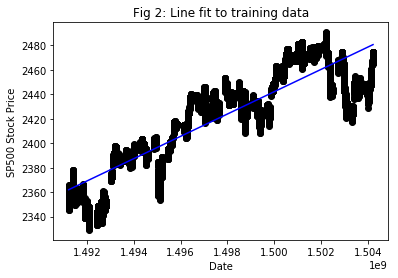

In [22]:

#Plot the line
py.scatter(xTrainingArray, yTrainingArray, color='black')
py.plot(date.values.reshape((len(date),1)),model.predict(date.values.reshape((len(date),1))),color='blue')
py.xlabel('Date')
py.ylabel('SP500 Stock Price')
py.title('Fig 2: Line fit to training data')
py.show()

In [31]:
meanValidationError = np.mean( (yValidationArray.values.reshape(len(yValidationArray),1) - model.predict(xValidationArray.values.reshape(len(xValidationArray),1)))**2 )
meanTestError = np.mean( (yTestArray.values.reshape(len(yTestArray),1) - model.predict(xTestArray.values.reshape(len(xTestArray),1)))**2 )

print 'Validation MSE: ', meanValidationError, '\nTest MSE: ', meanTestError

Validation MSE:  328.249382164115 
Test MSE:  342.39535745731905
